## Phys3112 Tutorial 5 - Time Variance and Iterative Methods
This is the *beginner* tutorial, where you will learn basic iterative structures in python (eg for loop, while loop) and then do some practice iterating across time and space. A [youtube tutorial](https://www.youtube.com/watch?v=pC5AWAMWlIQ) going through this notebook is available.

Iteration refers to repeating a similar procedure multiple times, with potential changes to the inputs of the procedure or a small part of the process. We are going to find that these are very suitable to finding solutions to systems with a spatial distribution, for example the something. We are going to begin by learning the basic iterative structures.

In [5]:
import numpy as np
from matplotlib import pyplot as plt

Step 1: For and While loops.

Goal: become familiar with how a [For Loop](https://wiki.python.org/moin/ForLoop) and [While Loop](https://wiki.python.org/moin/WhileLoop) work

In [3]:
## See links above and associate lecture for how a For and While loop work in theory.
# A For loop will repeat sections of code FOR a certain amount of times.
# In python, you need to give it an iterable (eg a list, a vector etc) that the loop will iterate through

# Let's make a list of some numbers
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Let's tell a for loop to list through the numbers and print them one by one
for i in numbers:
    print(i)

# By writing for 'i' in numbers, we are telling the loop to go through the list 'numbers' one by one, and each time 
# the current number is stored in 'i'.

# What about if we want a loop to execute X times? Then we do:
max_times = 14
for i in range(max_times):
    # Do what you want
    print(i)


1
2
3
4
5
6
7
8
9
10
range(0, 14)
0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [18]:
# A while loop funtions in a similar way, but it will iteratute until something is no-longer true
# This is called the condition of the loop; make sure you ensure it will eventually be false, or your loop may continue forever

# We can do a simple number-of-iterations like the above
limit = 14
i = 0
while i < limit:
    print(i)
    i = i+1
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [8]:
# Or we could do something more interesting, like looping through an array until we find an odd number
array_set = [2, 4, 7, 8, 6, 10, 12, 13]
i = 0
while np.mod(array_set[i],2) == 0:
    print(array_set[i])
    i = i+1
print('Odd number found! It was number ' + str(array_set[i]) + " at position " + str(i))

2
4
Odd number found! It was number 7 at position 2


One of the more powerful things we can do with for and while loops is utilise their indexing; instead of just repeating code, we can direct them to take sequential inputs and produce sequential outputs.

In [9]:
# Let's say we have two vectors, a and b
a = [1, 2, 3, 4, 5]
b = [6, 7, 8, 9, 10]

# If we wanted to perform some element-wise operation on these vectors, we could use a for loop! 
# For example, adding them together
c = list()

# Here, we will need to generate an index that we are going to use.
# We first tell our for loop how many times to iterate
for i in range(len(a)):
    # This loop will iterate as many times as 'a' has elements.
    # But the variable 'i' now refers to our position in the vector! 
    print("Element " + str(i) + " of a is " + str(a[i]))
    print("Element " + str(i) + " of b is " + str(b[i]))
    # We are now able to use 'i' as an INDEX, that will point to a specific location in a or b
    # So let's make our own add-together variable
    c.append(a[i] + b[i])

print(c)

# Here's another example that squares everything in the list 'q'
q = [1, 2, 5, 8 ,9]
for i in q:
    print(i**2)
    
# Here's another example that tells you if the number is divisible by 3
p = [1, 3, 5, 9, 11]
truth = list()
for i in p:
    if np.mod(i,3) == 0:
        truth.append(True)
    else:
        truth.append(False)

# Note that if we are iterating over only one list, we don't need to do indexing; we can just let 'i' directly be the value.
print(truth)
    

Element 0 of a is 1
Element 0 of b is 6
Element 1 of a is 2
Element 1 of b is 7
Element 2 of a is 3
Element 2 of b is 8
Element 3 of a is 4
Element 3 of b is 9
Element 4 of a is 5
Element 4 of b is 10
[7, 9, 11, 13, 15]
1
4
25
64
81
[False, True, False, True, False]


But the even *more* powerful use of loops is performing iterative calculations on the data from previous results of the loop. As an example, let's calculate the fibbonaci sequence, which requires the previous two values to calculate the next value:

In [10]:
# Using a FOR loop, we will calculate the first N fibbonaci numbers
N = 100
fibbonaci = list()
for i in range(N):
    # We have to now have a boundary condition; the first two numbers are 1!
    if i == 0 or i == 1:
        fibbonaci.append(1)
    else:
        # We want to add the previous TWO numbers together
        number = fibbonaci[i-1] + fibbonaci[i-2]
        fibbonaci.append(number)
print(fibbonaci)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049, 12586269025, 20365011074, 32951280099, 53316291173, 86267571272, 139583862445, 225851433717, 365435296162, 591286729879, 956722026041, 1548008755920, 2504730781961, 4052739537881, 6557470319842, 10610209857723, 17167680177565, 27777890035288, 44945570212853, 72723460248141, 117669030460994, 190392490709135, 308061521170129, 498454011879264, 806515533049393, 1304969544928657, 2111485077978050, 3416454622906707, 5527939700884757, 8944394323791464, 14472334024676221, 23416728348467685, 37889062373143906, 61305790721611591, 99194853094755497, 160500643816367088, 259695496911122585, 420196140727489673, 679891637638612258, 110008777836

Finally, looping structures can be used to find array-like or matrix-like solutions to problems. For example, let's consider a harmonic potential U = kx^2; we can numerically evaluate this potential for a certain range using a for loop. 

To start to do this, we need to *make some decisions as to how our simulation is going to run*. These decisions are influence by, but technically independent from the physical problem we are modelling.

In this case, we want to ask;
1. What range of values should we evaluate U(x) for?
2. What step size / number of steps for U(x) do we want to evaluate for?

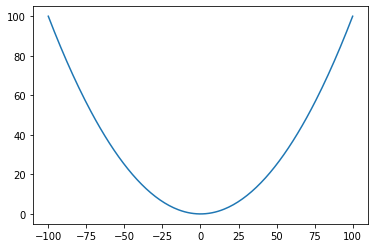

In [11]:
# Set our simulation settings

x_min = -100
x_max = 100
step_size = 1
k = 0.01

# Determine our input vector; the array of x positions that we will access during our for loop.
# You always need to determine two of the following; range, number of points, step size.
num_samples = (x_max-x_min)//step_size
x_inputs = np.linspace(x_min, x_max, num_samples)

output = list()
for x in x_inputs:
    output.append(k*x**2)
    
plt.plot(x_inputs, output)
    


The more interesting problems to think about are ones that do not have simple analytic solutions! We consider these in the advanced tutorial. We will also consider 2D problems. For now, have a play around with simulating solutions to simple numerical problems using for loops; find an equation on the internet and evaluate it for a bunch of positions.

**Homework / in-class problem**

Write your own iterative sequence to evaluate the following:
- The first three numbers in a sequence are 1, 3, 7. 
- The following number is equal to the ratio of the differences of the previous three, with the most recent numbers on the numerator  (eg the 4th number is (7-3) /(3-1) = 2)
- What is the 107th number in the sequence?
- What is the largest number that occurs after 1000 iterations?
(Note that they will not be integers for very long!)

